In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2

In [2]:
def step(state,action):
    
    done= False
    reward=-1
    next_state=state

    #Left
    if(a==0 and state%5!=0):
        next_state= state-1

    #Up
    if(a==1 and state>4):
        next_state= state-5

    #Right       
    if(a==2 and state%5!=4):
        next_state= state+1

    #Down        
    if(a==3 and state<20):
        next_state= state+5


   #Check if we reached Terminal States 
    if(next_state in Cross):
        reward= -50
        done=True

    if(next_state in Goal):
        if(next_state==24):
            reward= 20
        else:
            reward=5

        done= True
        
    return(next_state, reward, done, [state,action,next_state,reward])


# EXPECTED SARSA

In [5]:
total_episodes= 25000*4
e=0.95
min_e= 0.1

Start=0
alpha=0.2
gamma=0.99
decay_rate=0.005

Goal= [24,12]
Cross= [9,10,21]
REWARDS=[]
Q= np.zeros((25,4))

for episode in range(total_episodes):
    Tr=0
    done= False
    state=0

    P= [e/4]*4
    greedy_arm= np.argmax(Q[state])
    P[greedy_arm]+= (1-e)
    
    a= np.random.choice([0,1,2,3], p=P)
    
    while not done:
        
        next_state, reward, done, info= step(state,a)
        
        P= [e/4]*4
        greedy_arm= np.argmax(Q[next_state])
        P[greedy_arm]+= (1-e)
        
        E=0
        for a_ in range(4):
            next_state, reward, done, info= step(state,a_)
            E= E + (Q[next_state][a_]*P[a_])
            
        
        Q[state][a]= Q[state][a]+(alpha*(reward + (gamma*E)- Q[state][a]))
        
        
        a= np.random.choice([0,1,2,3], p=P)
        state= next_state
        
        Tr+=reward
        
    REWARDS.append(Tr)
    
    e= min_e + ((0.9-min_e)*np.exp(-decay_rate*episode))
    
    print(episode, end=' \r')           
            


# State Action Value Table After Training

In [7]:
Q=Q.round(2)
for k in range(25):
    print('State',k,':', Q[k])

State 0 : [7.7  7.7  8.89 7.05]
State 1 : [ 7.7   8.89 10.09  9.74]
State 2 : [ 8.89 10.09 11.3  11.17]
State 3 : [10.09 11.3   8.53 12.62]
State 4 : [ 11.3    8.53   8.53 -50.  ]
State 5 : [  7.     7.7    9.74 -50.  ]
State 6 : [ 7.02  8.89 11.17  4.73]
State 7 : [ 9.72 10.09 12.62  5.  ]
State 8 : [ 11.17  11.3  -50.    15.62]
State 9 : [0. 0. 0. 0.]
State 10 : [0. 0. 0. 0.]
State 11 : [-43.29   8.88   5.     1.99]
State 12 : [0. 0. 0. 0.]
State 13 : [ 5.   12.62 15.56 17.25]
State 14 : [ 15.62 -50.    15.56  18.59]
State 15 : [ -0.36 -10.    -0.39   0.  ]
State 16 : [ -0.5    0.36  15.56 -18.  ]
State 17 : [12.81  5.   17.25 12.94]
State 18 : [15.56 15.62 18.59 18.52]
State 19 : [17.25 15.56 18.59 20.  ]
State 20 : [0. 0. 0. 0.]
State 21 : [0. 0. 0. 0.]
State 22 : [-29.52  15.56   8.53   8.25]
State 23 : [12.93 17.25 20.   18.52]
State 24 : [0. 0. 0. 0.]


# EVALUATE THE POLICY FROM EXPECTED SARSA

In [9]:
REWARD=[]
for runs in range(500):
    
    state=0
    done=False
    Tr=0
    while not done:
        
        reward=-1
        next_state=state
        a= np.argmax(Q[state])
        
        #Left
        if(a==0 and state%5!=0):
            next_state= state-1
  
        #Up
        if(a==1 and state>4):
            next_state= state-5
       
        #Right       
        if(a==2 and state%5!=4):
            next_state= state+1
      
        #Down        
        if(a==3 and state<20):
            next_state= state+5
            
       #Check if we reached Terminal States 
        if(next_state in Cross):
            reward= -50
            done=True
        
        if(next_state in Goal):
            if(next_state==24):
                reward= 20
            else:
                reward=5
                
            done= True
        
        state= next_state
        Tr+=reward
    
    REWARD.append(Tr)
   
        

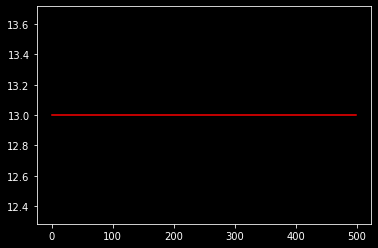

In [10]:
plt.style.use('dark_background')
plt.figure(0)
plt.plot(REWARD, color='red')

Expected SARSA found the optimum policy and maximized our reward to +13, when we reach Goal 2